### Dataset Overview

Content

Gender: Gender of the passengers (Female, Male)

Customer Type: The customer type (Loyal customer, disloyal customer)

Age: The actual age of the passengers

Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)

Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)

Flight distance: The flight distance of this journey

Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient

Ease of Online booking: Satisfaction level of online booking

Gate location: Satisfaction level of Gate location

Food and drink: Satisfaction level of Food and drink

Online boarding: Satisfaction level of online boarding

Seat comfort: Satisfaction level of Seat comfort

Inflight entertainment: Satisfaction level of inflight entertainment

On-board service: Satisfaction level of On-board service

Leg room service: Satisfaction level of Leg room service

Baggage handling: Satisfaction level of baggage handling

Check-in service: Satisfaction level of Check-in service

Inflight service: Satisfaction level of inflight service

Cleanliness: Satisfaction level of Cleanliness

Departure Delay in Minutes: Minutes delayed when departure

Arrival Delay in Minutes: Minutes delayed when Arrival

Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set()
import warnings
warnings.filterwarnings('ignore')

In [190]:
# !pip install seaborn --upgrade

## Read the file

In [285]:
df = pd.read_csv("D:\Airline\\train.csv")

In [286]:
df.shape

(103904, 25)

In [287]:
df.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [288]:
df['satisfaction'].unique()
 

array(['neutral or dissatisfied', 'satisfied'], dtype=object)

## Drop absolute unnecessary columns

In [192]:
df.drop(['Unnamed: 0', 'id'], axis=1, inplace=True)

## Imbalance check

transform the satisfaction string category to numerical category for the imbalance check

In [193]:
df['satisfaction'] = df.satisfaction.apply(lambda x: int(1) if x == 'satisfied' else int(0))

In [194]:
print(df.satisfaction.value_counts()/len(df.satisfaction))

0    0.566667
1    0.433333
Name: satisfaction, dtype: float64


## Missing Value data analysis

In [195]:
NA_columns = [column for column in df.columns if df[column].isnull().sum() > 0]

In [196]:
NA_columns

['Arrival Delay in Minutes']

the percentage of the NA data

In [197]:
print(df[NA_columns].isnull().sum()/ len(df[NA_columns]))

Arrival Delay in Minutes    0.002984
dtype: float64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029A4D7C5308>]],
      dtype=object)

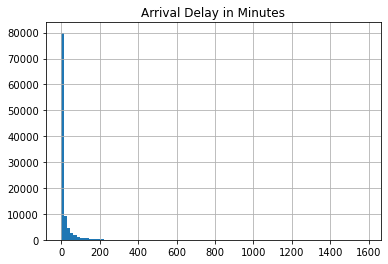

In [198]:
df[NA_columns].hist(bins=100)

#### the distribution very right skewed

see the effect of the nan with the satisfaction and compare it to non nan with satisfaction. 1 for nan row data and 0 for non nan

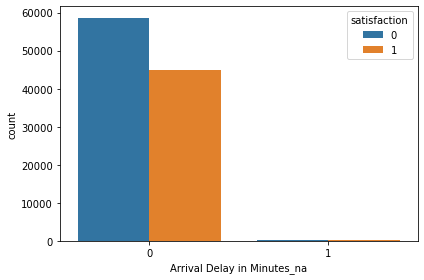

In [199]:
for col in NA_columns:
    df[col + '_na'] = np.where(df[NA_columns].isnull(), 1, 0)
    sns.countplot(col + '_na', data=df, hue='satisfaction' )
    plt.tight_layout()

cause the nan percentage s very small, so I plot the nan here to see the effect

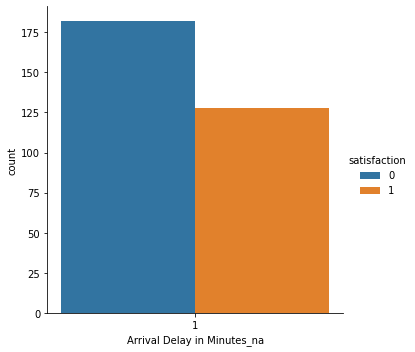

In [200]:
nan_data = df[(df['Arrival Delay in Minutes_na'] == 1)]
sns.catplot('Arrival Delay in Minutes_na', data=nan_data, kind='count', hue='satisfaction' )

#### the plot showed that the nan value is sligthly affect the satisfaction, or even not affecting at all cause the satisfaction percentage are the same in non nan and nan.

In [201]:
df.drop('Arrival Delay in Minutes_na', axis=1, inplace=True)

## Numeric Columns Analysis

In [202]:
num_columns = [column for column in df.columns if df[column].dtypes != 'O']

### Discrete Numeric Columns

In [203]:
num_columns_discrete = [column for column in num_columns if len(df[column].unique()) <= 10 and column not in ['satisfaction']]

the num_columns _discrete is appropriate according to the dataset as service satisfaction value in each columns

transform data 0 (Not Applicable) to mode in each columns

In [204]:
for col in num_columns_discrete:
    modus_value = str(df[col].mode()[0])
    df[col] = df[col].astype(str).apply(lambda x: x.replace('0', modus_value))
    df[col] = df[col].astype(int)

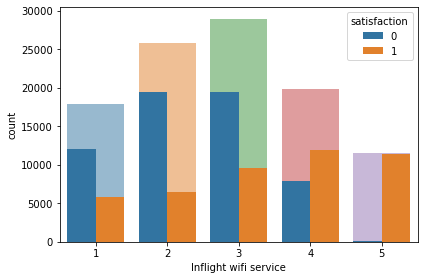

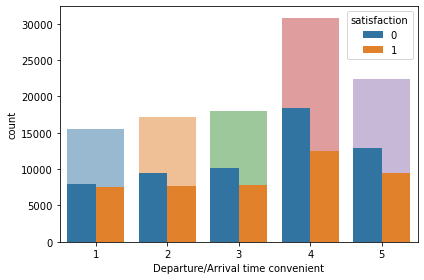

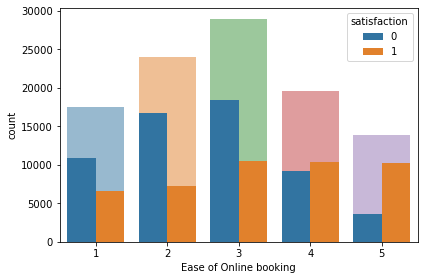

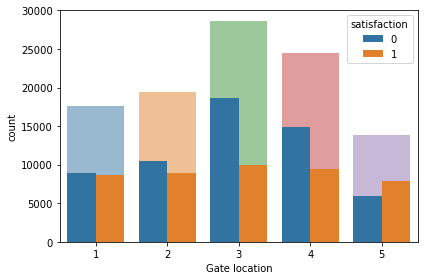

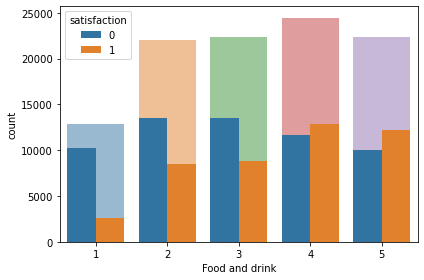

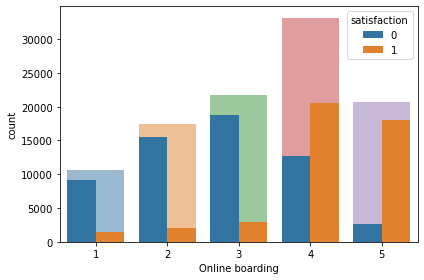

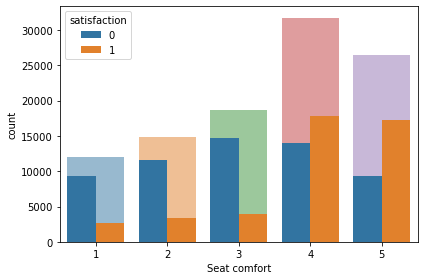

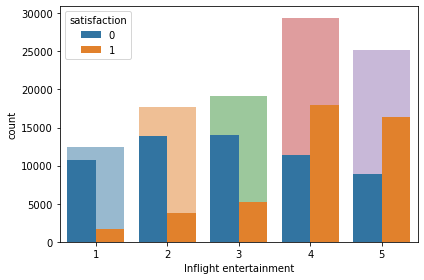

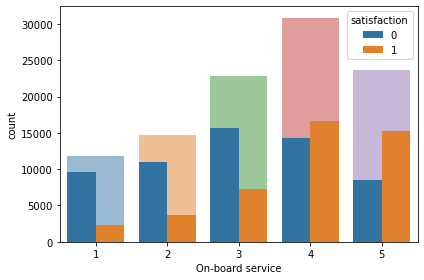

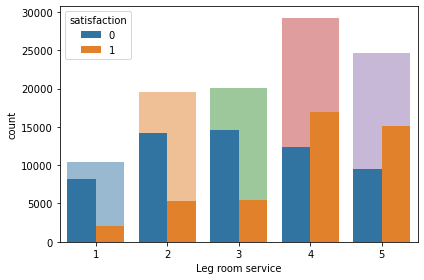

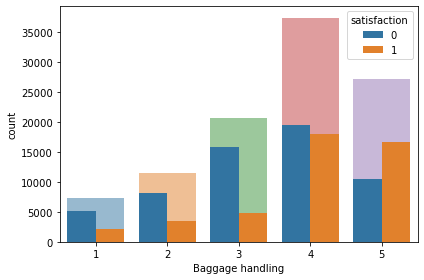

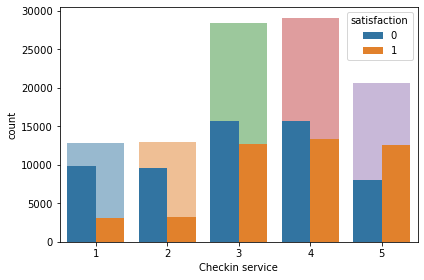

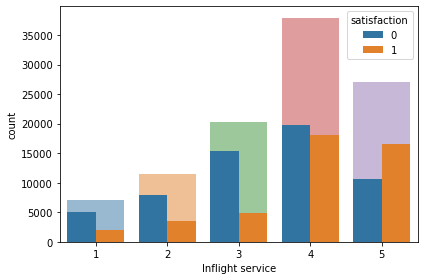

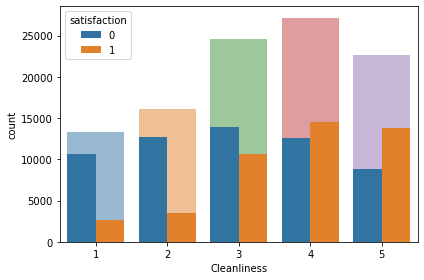

In [205]:
for col in num_columns_discrete:
    plt.figure()
    sns.countplot(col, data=df, alpha=0.5)
    sns.countplot(col, data=df, hue='satisfaction')
    plt.tight_layout()

#### inflight wifi service most of the data are in 2 and 3 point and end up a lot dissatisfied, it happens also in ease of online booking, gate location . departure/arrival time are in good trends but not lead to the satisfaction of the airline. Food and drink seems neutral and not impresive . Online boarding, seat comfort, inflight entertaintment, on-board-service, leg room service, cleanliness are in the good shape with the most of the data in point 4 and the trends lead to the satisfaction of the airline. Baggage handling, checkin service and inflight service are slightly like departure/arrival time but still got a lot satisfaction in point 5

#### so in summary inflight wifi service, online booking and gate location need big improvement for better overall service performance.

#### Food and drink, baggage handling, checkin service and inflight service just need little improvement cause they already have the good trends

#### and big question mark for the departure/arrival time convenient, why they have good trends but end up in dissatisfaction.

### Continuous Numeric Columns

In [206]:
num_columns_continue = [column for column in num_columns if column not in num_columns_discrete and column not in ['satisfaction']] 

In [207]:
num_columns_continue

['Age',
 'Flight Distance',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes']

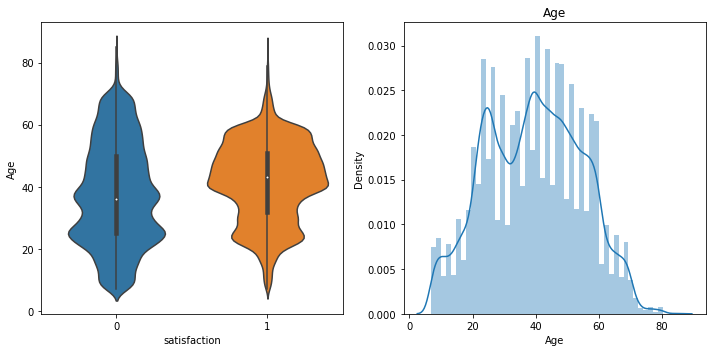

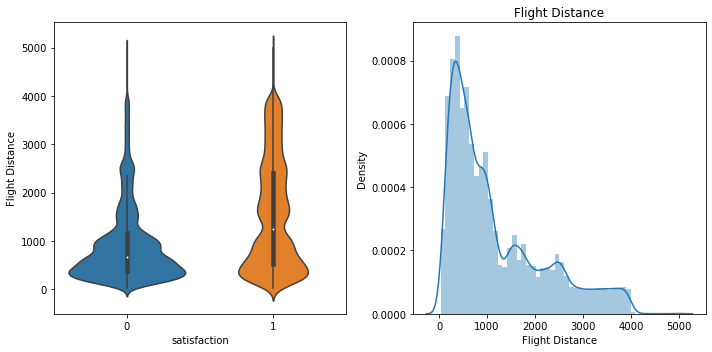

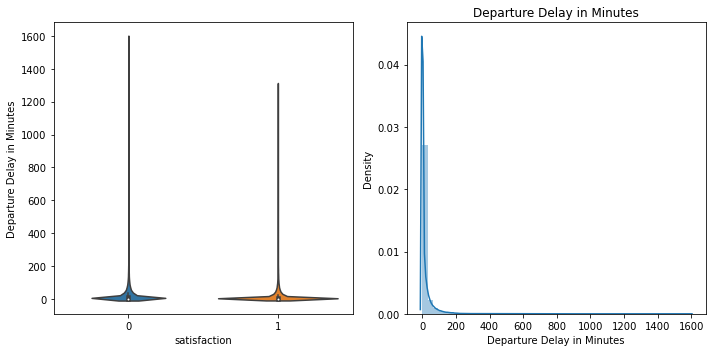

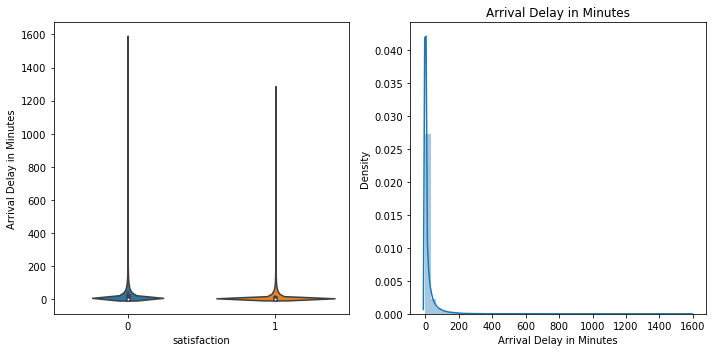

In [208]:
for col in num_columns_continue:
    fig, axs = plt.subplots(1,2, figsize=(10,5))
    sns.violinplot(y=col, data=df, x='satisfaction', ax=axs[0])
    plt.title(col + ' and satisfaction')
    sns.distplot(df[col], ax=axs[1])
    plt.title(col)
    plt.tight_layout()

#### Age < 40 and age > 60 tend to not satisfied, while age range for 40 - 60 tend to be satisifed with the airlines. In short range flight distance the passenger tend to be not satisfied while at the more long range tend to be satisfied. In arrival and departure delay, the shorter delay tend to be satisfied the passenge.

## Categorical columns analysis

In [209]:
cat_columns = [column for column in df.columns if column not in num_columns]

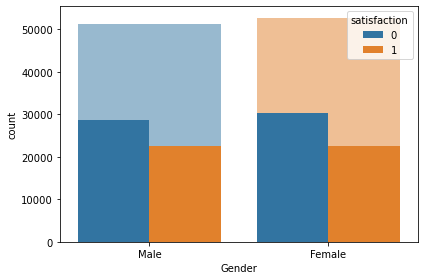

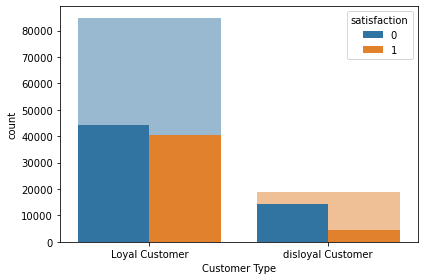

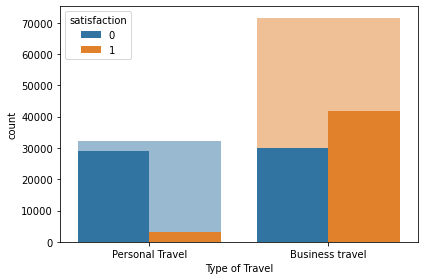

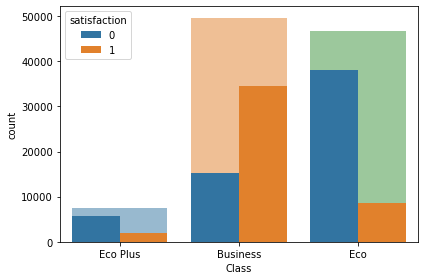

In [210]:
for col in cat_columns:
    plt.figure()
    sns.countplot(col, data=df, alpha=0.5)
    sns.countplot(col, data=df, hue='satisfaction')
    plt.tight_layout()

#### For the gender and customer type, the data shows that they are less important for the overall satisfaction. The passenger of business class and type shows that they are tend to be satisfied. and the eco class shows the worst percentage of the passenger to not to be satisfied with the airline.

## Check the correlation between columns in the data

In [211]:
print(num_columns_discrete)

['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']


In [212]:
print(num_columns_continue)

['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']


In [213]:
print(cat_columns)

['Gender', 'Customer Type', 'Type of Travel', 'Class']


### Correlation with the gender

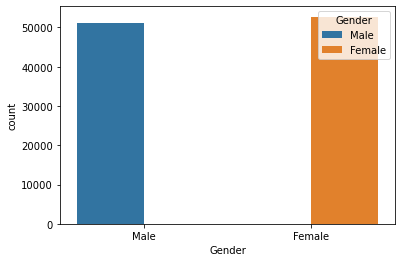

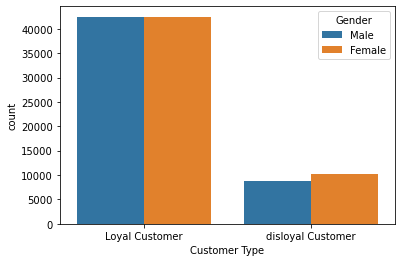

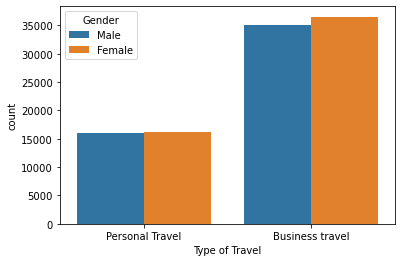

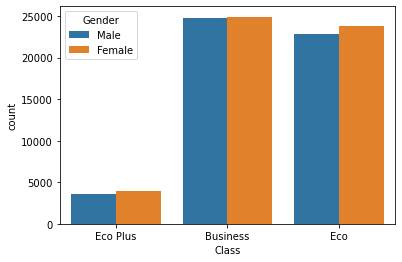

In [214]:
for col in cat_columns :
    plt.figure()
    sns.countplot(data=df, x=col, hue='Gender')

#### the gender seem balance, therefore gender is less essential for the another categorical columns

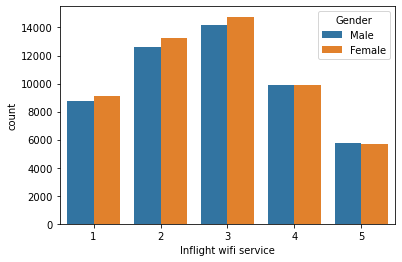

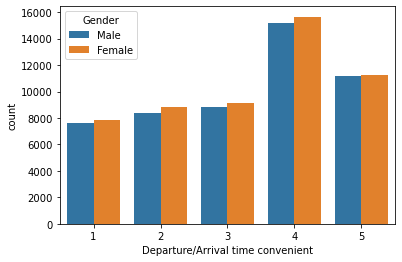

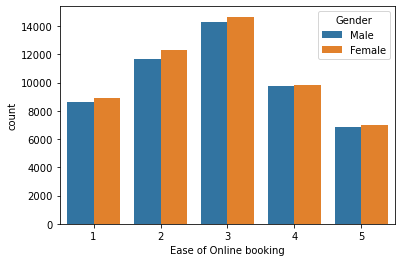

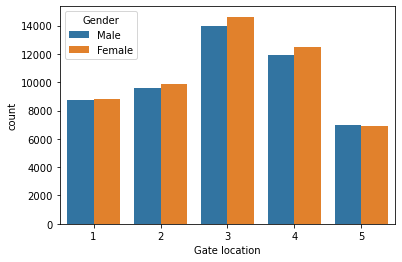

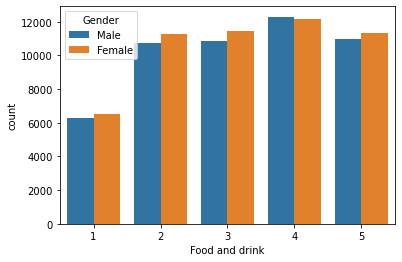

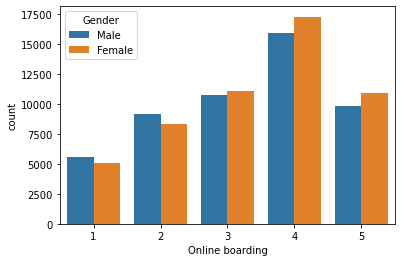

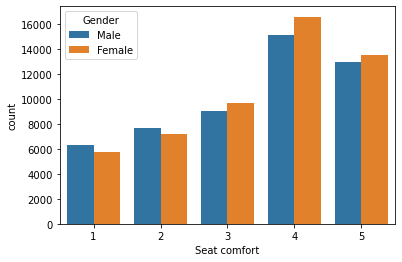

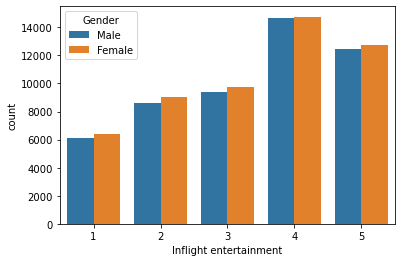

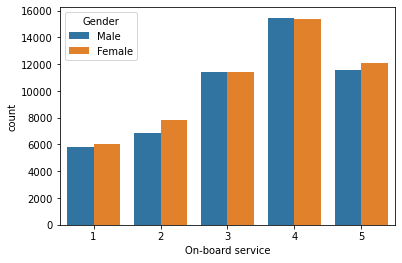

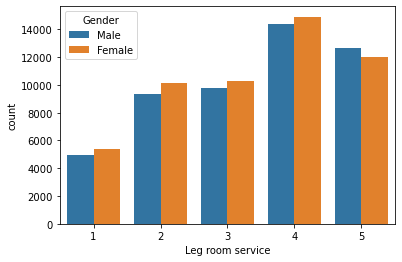

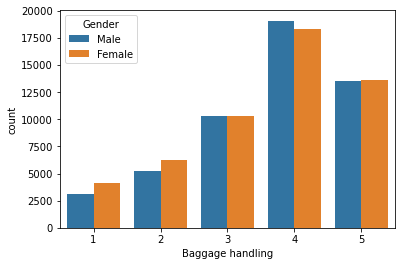

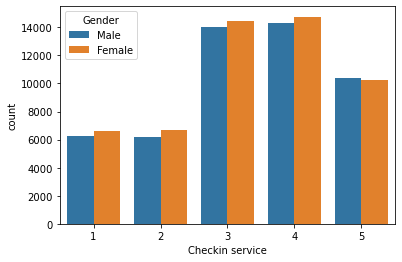

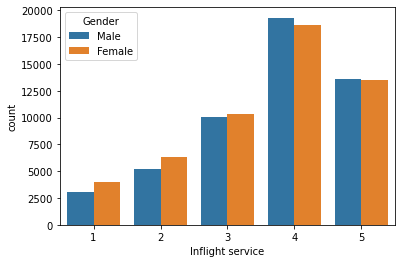

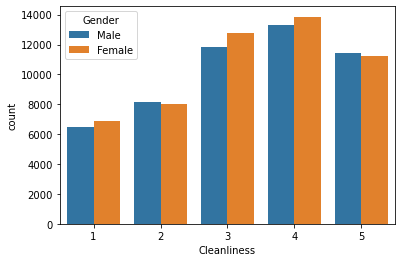

In [215]:
for col in num_columns_discrete:
    plt.figure()
    sns.countplot(data=df, x=col, hue='Gender')

#### its also the same for the numerical discrete columns, which is the gender is the less important factor 

### Correlation with the age

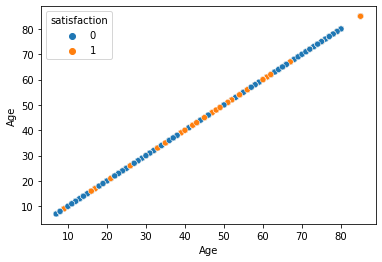

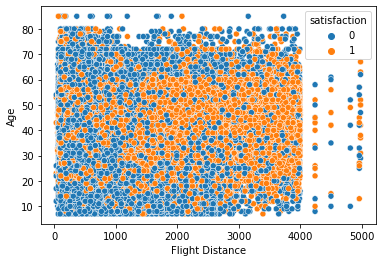

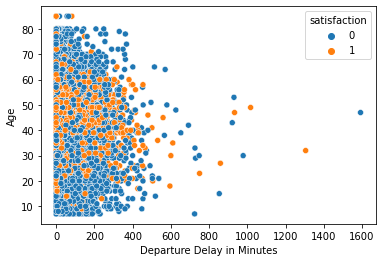

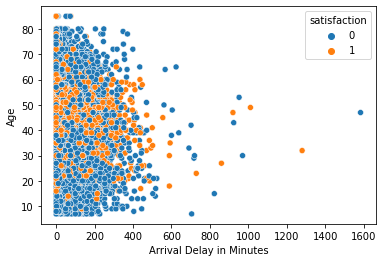

In [217]:
for col in num_columns_continue:
    plt.figure()
    sns.scatterplot(data=df, x=col, y='Age', hue='satisfaction')

#### there is no correlation here

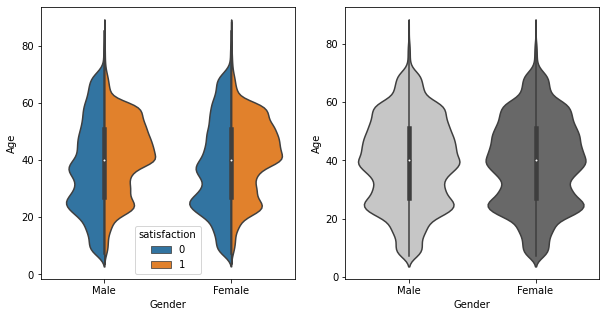

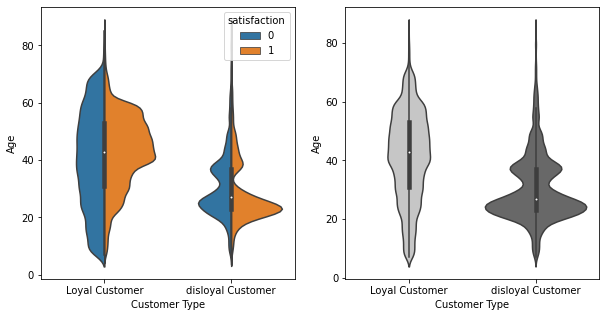

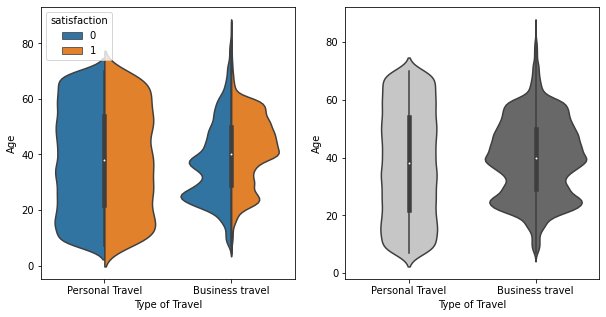

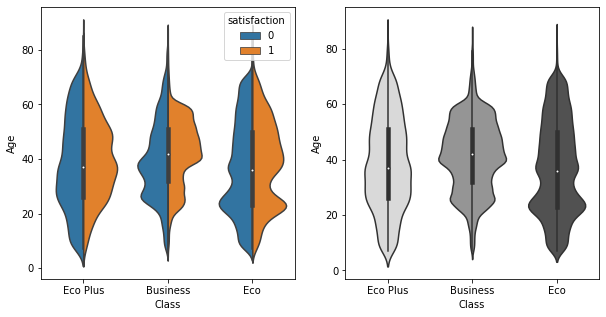

In [218]:
for col in cat_columns:
    fig, axs = plt.subplots(1,2, figsize=(10,5))
    sns.violinplot(data=df, x=col, y='Age', hue='satisfaction', ax=axs[0], split=True)
    sns.violinplot(data=df, x=col, y='Age', ax=axs[1], palette='Greys')

#### Gender for the age are completely the same, less important. the passenger with age > 40 tend to be loyal and satisfied with the airline, while passenger with the younger age tend to be disloyal but satisfied with the airline. again the passenger with age over 40 dominance the business travel type of travel and tend to be satisfied with the airline. eco plus and eco dominance by the younger passenger, < 20, with tend to be not satisfied, while bussiness class are dominance by the older passenger, with age over 40 years and tend to be satisfied with the airline. 

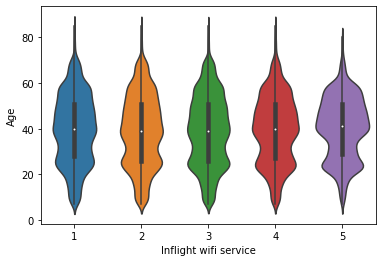

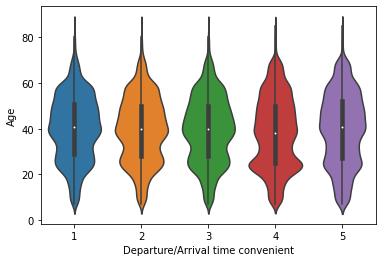

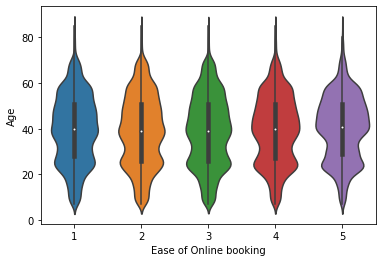

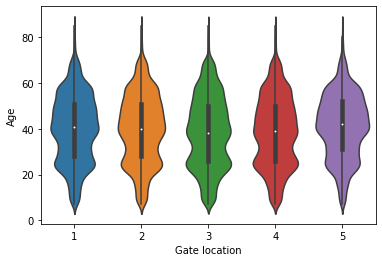

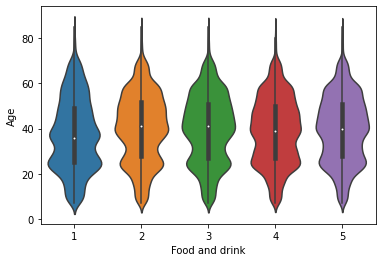

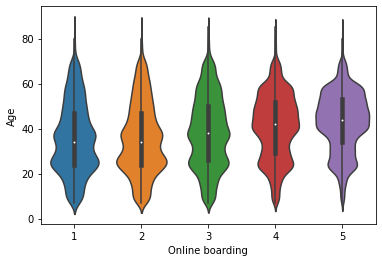

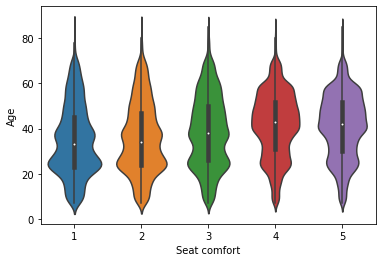

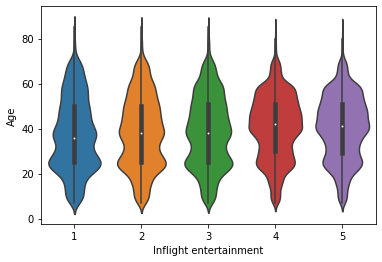

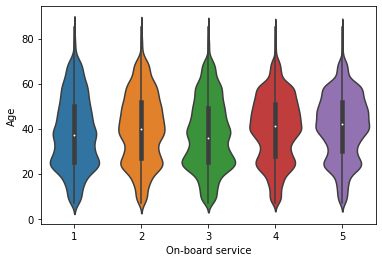

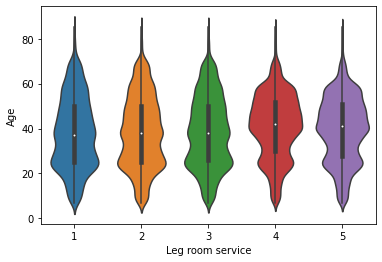

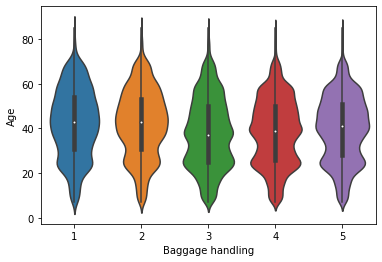

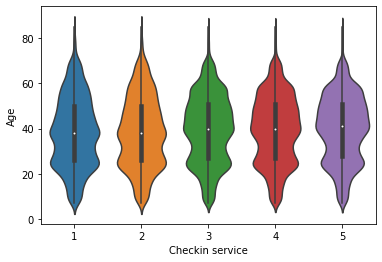

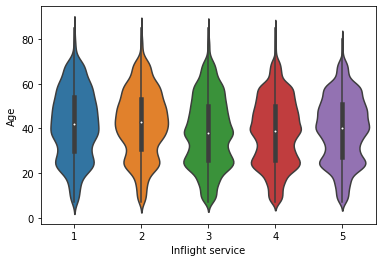

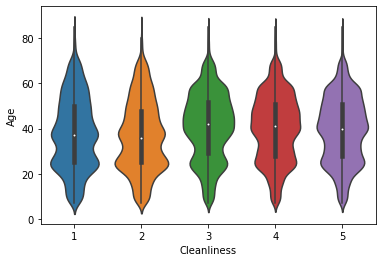

In [219]:
for col in num_columns_discrete:
    plt.figure()
    sns.violinplot(data=df, x=col, y='Age')

#### online boarding, seat comfort, inflight entertainment, on-board service, leg room service are dominant to provide the good service for older people, age 40 - 60. and Baggage handling tend to be bad service for the older people

### Another Table correlation information

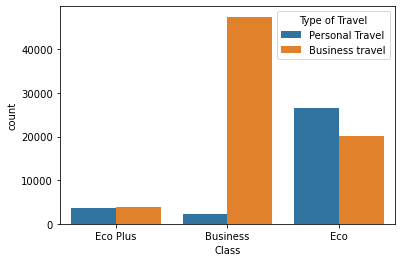

In [220]:
sns.countplot(data=df, x='Class', hue='Type of Travel')

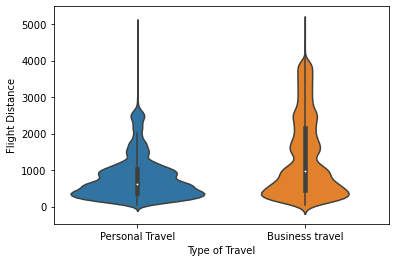

In [221]:
sns.violinplot(data=df, x='Type of Travel', y='Flight Distance')

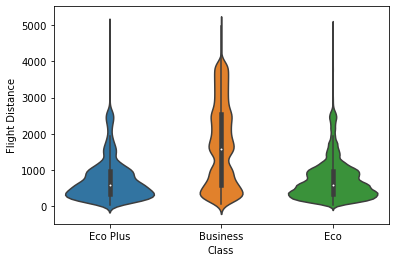

In [222]:
sns.violinplot(data=df, x='Class', y='Flight Distance')

#### Business class are dominant by the business type of travel with long range filght distance

## Conclussion for Exploratory Data Analysis

#### The Airlines passenger satisfaction are dominanth by the older people within range of the age between 40 - 60 for the business travel using business class wihtin long flying range distance, which supported and reinforced by good services score for older people like seat comfort, on-board service and leg room.

# Feature Engineering

## Fix the NAN and Not Applicable data

In [223]:
for col in NA_columns:
    median_value = df[col].median()
    df[col] = df[col].fillna(median_value)

In [224]:
NA_columns

['Arrival Delay in Minutes']

check the NA after the fillna

In [225]:
df.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [226]:
num_columns_discrete

['Inflight wifi service',
 'Departure/Arrival time convenient',
 'Ease of Online booking',
 'Gate location',
 'Food and drink',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Inflight service',
 'Cleanliness']

transform the Not Applicable (0) with the modus in columns services (num_columns_discrete)

In [227]:
for col in num_columns_discrete:
    modus_value = str(df[col].mode()[0])
    df[col] = df[col].astype(str).apply(lambda x: x.replace('0', modus_value))
    df[col] = df[col].astype(int)

## Transform not normally distributed data to normally distributed

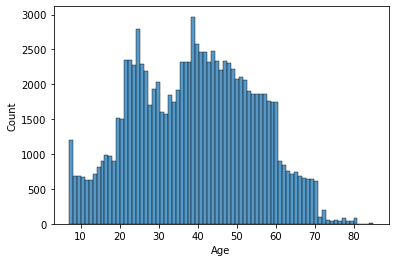

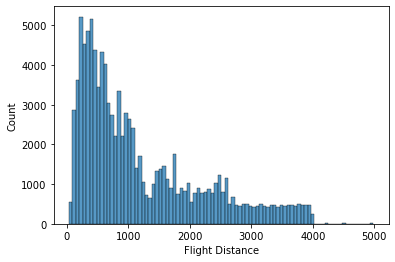

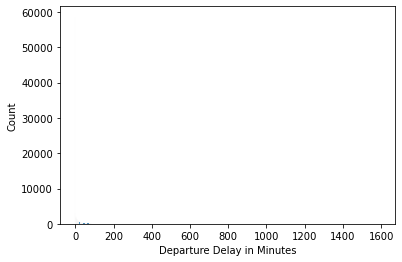

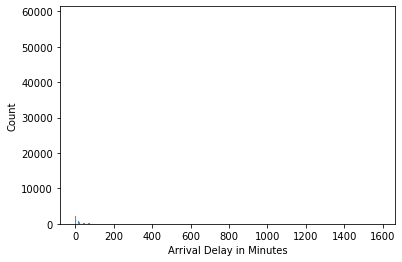

In [228]:
for col in num_columns_continue:
    plt.figure()
    sns.histplot(data=df, x=col)

The Flight Distance need to transform to get the more normally distributed. here Iam using two type of transform, and compare the transform result

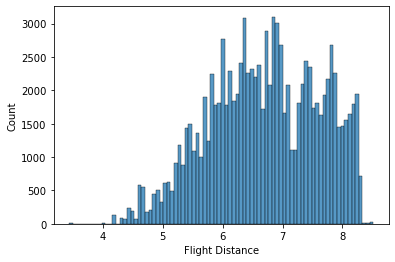

In [229]:
FD_log = np.log(df['Flight Distance'])
plt.figure()
sns.histplot(FD_log)

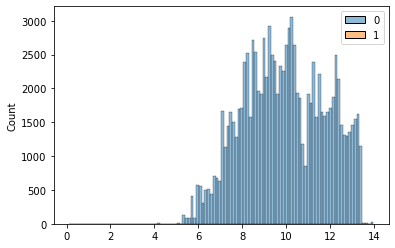

In [230]:
import scipy.stats as stats
FD_boxcox = stats.boxcox(df['Flight Distance'])
plt.figure()
sns.histplot(FD_boxcox)

from the result log transfrom give more normally distributed, so I choose log transform method

In [231]:
df['Flight Distance'] = FD_log

## Encode string categorical column into numeric

In [232]:
def encode_category(data, column, target):
    ordinal_data= data.groupby([column])[target].sum().sort_values(by=column, ascending=False).index
    ordinal_num = {k: i for i, k in enumerate(ordinal_data, start=0)}
    data[column] = data[column].map(ordinal_num)
    print(ordinal_data)

In [233]:
for col in cat_columns:
    encode_category(df, col, ['satisfaction'])

Index(['Male', 'Female'], dtype='object', name='Gender')
Index(['disloyal Customer', 'Loyal Customer'], dtype='object', name='Customer Type')
Index(['Personal Travel', 'Business travel'], dtype='object', name='Type of Travel')
Index(['Eco Plus', 'Eco', 'Business'], dtype='object', name='Class')


# Feature Selection

In [235]:
y = df['satisfaction']
X = df.drop(['satisfaction'], axis=1)

## Filter Methods

### Continuous Columns

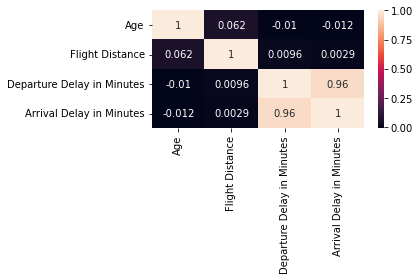

In [236]:
sns.heatmap(df[num_columns_continue].corr(), annot=True)
plt.tight_layout()

'Departure Delay in Minutes' and 'Arrival Delay in Minutes' are too corelated for the correlation between independent features, so one of the features need to be drop

In [237]:
from sklearn.feature_selection import f_classif, SelectKBest
selector_cont = SelectKBest(score_func = f_classif, k=3)
selector_cont.fit(X[num_columns_continue], y)
pd.DataFrame({'Features':X[num_columns_continue].columns, 'F-Score':selector_cont.scores_, 'p-value':selector_cont.pvalues_})

Features      F-Score       p-value
0                         Age  1992.389117  0.000000e+00
1             Flight Distance  6920.836250  0.000000e+00
2  Departure Delay in Minutes   265.592493  1.229346e-59
3    Arrival Delay in Minutes   343.887980  1.208293e-76

because the 'Departure Delay in minutes' is the smallest F-score, so I drop it.

In [238]:
cont_select = X[num_columns_continue].columns[selector_cont.get_support()].tolist()

### Categorical columns

In [239]:
categorical_columns = [column for column in X.columns if column not in num_columns_continue]

In [240]:
from sklearn.feature_selection import chi2
selector_cat = SelectKBest(score_func= chi2, k=15)
selector_cat.fit(X[categorical_columns], y)
pd.DataFrame({'Features':X[categorical_columns].columns, 'score':selector_cat.scores_, 'p-value':selector_cat.pvalues_})

Features         score        p-value
0                              Gender      7.631270   5.736489e-03
1                       Customer Type    668.284630  2.358567e-147
2                      Type of Travel   6501.443676   0.000000e+00
3                               Class   5750.424760   0.000000e+00
4               Inflight wifi service   8470.634611   0.000000e+00
5   Departure/Arrival time convenient    119.779062   7.071371e-28
6              Ease of Online booking   3251.506322   0.000000e+00
7                       Gate location      0.028548   8.658272e-01
8                      Food and drink   2529.774523   0.000000e+00
9                     Online boarding  15346.619371   0.000000e+00
10                       Seat comfort   6418.250909   0.000000e+00
11             Inflight entertainment   8694.318238   0.000000e+00
12                   On-board service   5296.579646   0.000000e+00
13                   Leg room service   5157.812599   0.000000e+00
14                   Baggage handling   2448.815383   0.000000e+00
15                    Checkin service   2807.779358   0.000000e+00
16                   Inflight service   2361.213343   0.000000e+00
17                        Cleanliness   5060.439444   0.000000e+00

from the score, 'Gender', 'Departure/Arrival time convenient', and 'gate location' are the less important feature and have big score difference with another features

In [241]:
cat_select = X[categorical_columns].columns[selector_cat.get_support()].tolist()

All selected features

In [242]:
selected_features = cont_select + cat_select

# Machine Learning Modeling

## Define the X, Y and split it into Training and Test dataset

In [243]:
y = df['satisfaction']
X = df[selected_features]

In [244]:
y

0         0
1         0
2         1
3         0
4         1
         ..
103899    0
103900    1
103901    0
103902    0
103903    0
Name: satisfaction, Length: 103904, dtype: int64

In [245]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [246]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [247]:
X_test.shape

(20781, 18)

In [248]:
X_train.shape

(83123, 18)

In [249]:
import tensorflow
print(tensorflow.__version__)

2.7.0


In [250]:
# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [251]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 10,kernel_initializer='he_uniform',activation='relu',input_dim = 18))

# Adding the second hidden layer
classifier.add(Dense(units = 5, kernel_initializer = 'he_uniform',activation='relu'))
classifier.add(Dense(units = 5, kernel_initializer = 'he_uniform',activation='relu'))
# classifier.add(Dense(units = 10, kernel_initializer = 'he_uniform',activation='relu'))
# classifier.add(Dense(units = 10, kernel_initializer = 'he_uniform',activation='relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [252]:
classifier.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 10)                190       
                                                                 
 dense_10 (Dense)            (None, 5)                 55        
                                                                 
 dense_11 (Dense)            (None, 5)                 30        
                                                                 
 dense_12 (Dense)            (None, 1)                 6         
                                                                 
Total params: 281
Trainable params: 281
Non-trainable params: 0
_________________________________________________________________


In [253]:
# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 100,epochs = 100)

Epoch 1/100
557/557 [==============================] - 3s 4ms/step - loss: 0.4489 - accuracy: 0.7998 - val_loss: 0.3056 - val_accuracy: 0.8743
Epoch 2/100
557/557 [==============================] - 2s 3ms/step - loss: 0.2698 - accuracy: 0.8864 - val_loss: 0.2532 - val_accuracy: 0.8933
Epoch 3/100
557/557 [==============================] - 2s 3ms/step - loss: 0.2376 - accuracy: 0.8993 - val_loss: 0.2307 - val_accuracy: 0.9049
Epoch 4/100
557/557 [==============================] - 2s 3ms/step - loss: 0.2195 - accuracy: 0.9086 - val_loss: 0.2145 - val_accuracy: 0.9128
Epoch 5/100
557/557 [==============================] - 2s 3ms/step - loss: 0.2051 - accuracy: 0.9172 - val_loss: 0.2031 - val_accuracy: 0.9184
Epoch 6/100
557/557 [==============================] - 2s 3ms/step - loss: 0.1954 - accuracy: 0.9217 - val_loss: 0.1969 - val_accuracy: 0.9222
Epoch 7/100
557/557 [==============================] - 2s 3ms/step - loss: 0.1895 - accuracy: 0.9243 - val_loss: 0.1910 - val_accuracy: 0.9251

Epoch 58/100
557/557 [==============================] - 2s 3ms/step - loss: 0.1428 - accuracy: 0.9415 - val_loss: 0.1493 - val_accuracy: 0.9390
Epoch 59/100
557/557 [==============================] - 2s 3ms/step - loss: 0.1427 - accuracy: 0.9414 - val_loss: 0.1493 - val_accuracy: 0.9403
Epoch 60/100
557/557 [==============================] - 2s 3ms/step - loss: 0.1423 - accuracy: 0.9413 - val_loss: 0.1487 - val_accuracy: 0.9410
Epoch 61/100
557/557 [==============================] - 2s 3ms/step - loss: 0.1422 - accuracy: 0.9412 - val_loss: 0.1477 - val_accuracy: 0.9412
Epoch 62/100
557/557 [==============================] - 2s 3ms/step - loss: 0.1418 - accuracy: 0.9416 - val_loss: 0.1481 - val_accuracy: 0.9395
Epoch 63/100
557/557 [==============================] - 2s 3ms/step - loss: 0.1419 - accuracy: 0.9417 - val_loss: 0.1473 - val_accuracy: 0.9409
Epoch 64/100
557/557 [==============================] - 2s 3ms/step - loss: 0.1412 - accuracy: 0.9417 - val_loss: 0.1467 - val_accuracy:

In [254]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


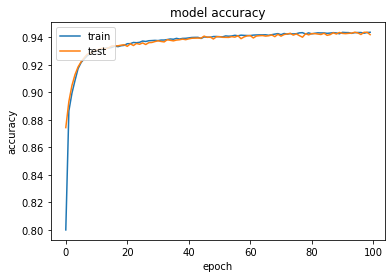

In [255]:
# list all data in history

print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

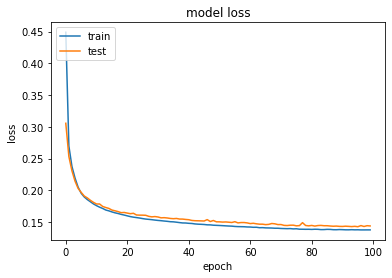

In [256]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [257]:
# from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score

In [258]:
# y_pred = classifier.predict_classes(X_test)

In [259]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [260]:
len(y_pred)


20781

In [261]:
# y_pred

In [262]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score
cm = confusion_matrix(y_test, y_pred)

In [263]:
cm


array([[11463,   307],
       [  900,  8111]], dtype=int64)

In [264]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,roc_auc_score, roc_curve

In [265]:
precision = precision_score(y_test, y_pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred)
print('Recall: %f' % recall)

Precision: 0.963531
Recall: 0.900122


In [266]:
# from sklearn.metrics import roc_auc_score, roc_curve

In [267]:
# y_pred = classifier.predict_proba(X_test)
#     y_pred = y_pred[:,1]

In [268]:
y_pred = classifier.predict(X_test)

In [269]:
AUC = roc_auc_score(y_test, y_pred)

In [270]:
 tpr, fpr, _ = roc_curve(y_test, y_pred)

Text(0, 0.5, 'True Positive Rate')

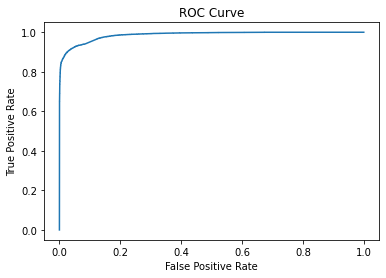

In [271]:
plt.plot(tpr, fpr)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [272]:
# !pip install keras-tuner

In [273]:
def build_model(hp):
    model = keras.Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=512,
                                            step=32),
                               activation='relu'))
        model.add(
            layers.Dropout(
                hp.Float(
                    'dropout',
                    min_value=0.0,
                    max_value=0.1,
                    default=0.005,
                    step=0.01)))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model

In [274]:
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

In [275]:
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
    directory='project1',
    project_name='Churn')

In [276]:
tuner.search(X_train, y_train,
             epochs=5,
             validation_split=0.2)

Trial 5 Complete [00h 03m 32s]
val_accuracy: 0.9535839756329855

Best val_accuracy So Far: 0.9535839756329855
Total elapsed time: 00h 37m 37s
INFO:tensorflow:Oracle triggered exit


In [277]:
best_model = tuner.get_best_models(num_models=1)[0]

In [278]:
tuner.results_summary()

Results summary
Results in project1\Churn
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
num_layers: 3
units_0: 320
dropout: 0.05
units_1: 160
learning_rate: 0.001
units_2: 320
units_3: 512
units_4: 64
units_5: 224
units_6: 448
units_7: 320
units_8: 384
units_9: 64
units_10: 512
units_11: 480
units_12: 32
units_13: 224
units_14: 128
units_15: 224
units_16: 224
Score: 0.9535839756329855
Trial summary
Hyperparameters:
num_layers: 4
units_0: 64
dropout: 0.05
units_1: 480
learning_rate: 0.001
units_2: 32
units_3: 32
Score: 0.9504762093226115
Trial summary
Hyperparameters:
num_layers: 16
units_0: 384
dropout: 0.02
units_1: 128
learning_rate: 0.001
units_2: 416
units_3: 384
units_4: 384
units_5: 224
units_6: 288
units_7: 512
units_8: 96
units_9: 320
units_10: 64
units_11: 416
units_12: 416
units_13: 224
units_14: 128
units_15: 384
units_16: 288
Score: 0.9468070069948832
Trial summary
Hyperparameters:
num_layers: 14
units_0: 128
dropout: 

In [279]:
loss,Test_Accuracy = best_model.evaluate(X_test, y_test)

650/650 [==============================] - 2s 3ms/step - loss: 0.1104 - accuracy: 0.9547


In [280]:
Test_Accuracy

0.9547182321548462